# Experimentos computacionais para induzir propriedades da regressão linear

A reiteração de dúvidas quanto a propriedades de um modelo de regressão linear em diversos cenários imaginados pelos alunos mostra que a abordagem de simplesmente responder a perguntas principalmente por meio de intuição dos conceitos matemáticos pode ser insuficiente.

## Meta-conhecimento

Procuraremos construir experimentos computacionais genéricos que exemplifiquem uma situação com incerteza quanto às propriedades dos modelos, que possam ilustrar (e não demonstrar) uma possível resposta.

Concretamente, sobre modelização por regressão linear, procuraremos descobrir/ilustrar propriedades das relações entre variáveis. Para isso, construiremos dados sintéticos (utilizando geradores prontos para isso) e criaremos uma variável target com alguma propriedade interessante a ser testada!

Sugestões de primeiros experimentos:

1.  Com target gerado por combinação linear de variáveis independentes:

    a. conseguimos recuperar exatamente os coeficientes da regressão idênticos aos pesos da combinação linear? Avaliar R2

    b. variantes:

        - adicionando uma variável linearmente dependente das variáveis anteriores
        - com duas variáveis imperfeitamente correlacionadas
        - adicionando ruído no target
        - excluindo uma ou várias variáveis condicionantes do dataset para treinamento

2.  Com target gerado por combinação linear, como item anterior, mas adicionando um componente do target como produto de duas variáveis independentes:

    a. repetir análise: coeficientes, resíduos

3.  Efeitos do tamanho relativo entre número de linhas e número de colunas do dataset. Os expertimentos anteriores foram provavelmente construídos com muito mais linhas do que colunas, mudaremos isso a seguir:

    a. analise resultados da modelização realizada sobre dataset com igual número de linhas e colunas

    b. sobre o dataset anterior descarte uma linha e compare o novo resultado com o anterior. Eventualmente, descarte múltiplas linhas e compare novamente.

Procurem redigir uma proposta da propriedade geral assim demonstrada.

Se conseguirem ilustrar experimentalmente uma propriedade particularmente interessante ou contra-intuitiva, compartilhem com o resto da turma!

Possíveis perguntas que poderiam suscitar novos experimentos:

- o que acontece na interpretação dos coeficientes se uma das variáveis tem um range de valores muito maior? Por exemplo, multiplicar a variável c0 por 1000
- sugiro testar diretamente a função de geração de regressão do sklearn, utilizando seus parâmetros de ruído (noise), n_informative, effective_rank (para simular correlações entre as variáveis), etc.
- traga suas dúvidas e sugestões de experimentos...

Já temos um caderno com experimentos computacionais para as propriedades de sobreajustamento (overfit) que será apresentado posteriormente.

Mas o método de experimentação computacional é extremamente genérico e deveria fazer parte do ferramental básico de todo cientista de dados.

Procuraremos desenvolver uma adaptação para árvores de decisão! Utilizando regras lógicas para construir o target!

Outro benefício do uso mais sistemático de dados sintéticos é de contornar as restrições de uso de dados reais, por questões de sigilo ou privacidade. Desde que os dados sintéticos reflitam as mesmas propriedades estatísticas dos dados reais, eles podem substituir o real, serem livremente publicados e utilizados em modelagem. Em tese, deveriam gerar os mesmos resultados... A ser testado! ;-)

_Referências:_

- geradores de dados sintéticos do sklearn: https://scikit-learn.org/stable/datasets/sample_generators.html
- geradores de dados sintéticos: https://towardsdatascience.com/synthetic-data-generation-a-must-have-skill-for-new-data-scientists-915896c0c1ae
- dados sintéticos para preservar sigilo de dados originais: https://research.aimultiple.com/synthetic-data/


In [38]:
# construindo dados sintéticos (utilizando o gerador de dados do scikit-learn)
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

from sklearn.datasets import make_regression
import pandas as pd

In [39]:
X, y = make_regression(n_samples=100, n_features=5, random_state=42)
df = pd.DataFrame(X)
df.columns = [f"c{i}" for i in df.columns]
df

,c0,c1,c2,c3,c4
0,-0.937825,0.515048,0.515035,3.852731,0.513786
1,1.088951,-0.715304,0.064280,0.679598,-1.077745
2,-0.601707,-1.057711,1.852278,0.822545,-0.013497
3,0.821903,0.091761,0.087047,-1.987569,-0.299007
4,1.549934,0.813517,-0.783253,-1.230864,-0.322062
...,...,...,...,...,...
95,0.232050,-0.718444,-1.448084,-0.213447,-1.407464
96,-1.415371,-0.802277,-0.420645,-0.161286,-0.342715
97,0.404051,0.257550,1.886186,-0.074446,0.174578
98,-0.926930,-1.024388,-0.059525,-0.252568,-3.241267


In [40]:
# Com target gerado por combinação linear de variáveis independentes:
# Fiquem livres para testar qualquer combinação linear, alterando os pesos
target = df["c0"] + 2 * df["c1"] + 3 * df["c2"] + 4 * df["c3"] + 5 * df["c4"] + 42

# Remapeando as variáveis
X = df
y = target

In [41]:
# a. conseguimos recuperar exatamente os coeficientes da regressão idênticos aos pesos da combinação linear? Avaliar R2

# importamos as funções necessárias da biblioteca scikit-learn:
# modelo de regressão linear
from sklearn.linear_model import LinearRegression

# separação treino-teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# instanciando o modelo de regressão linear
lr = LinearRegression()

# treinando o modelo
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
# Qual o desempenho esperado e porque?
# avaliando o desempenho
lr.score(X_test, y_test)

1.0

In [43]:
# Inspecionando o modelo

# o que se espera que sejam os coeficientes?
# Visualização dos coeficientes
pesos = pd.DataFrame({"Variável": X.columns, "Coeficientes": lr.coef_})
pesos

,Variável,Coeficientes
0,c0,1.0
1,c1,2.0
2,c2,3.0
3,c3,4.0
4,c4,5.0


In [44]:
# Quanto deveria ser o intercepto?
lr.intercept_

# O que modificar na construção do target para controlar o intercepto?

41.99999999999999

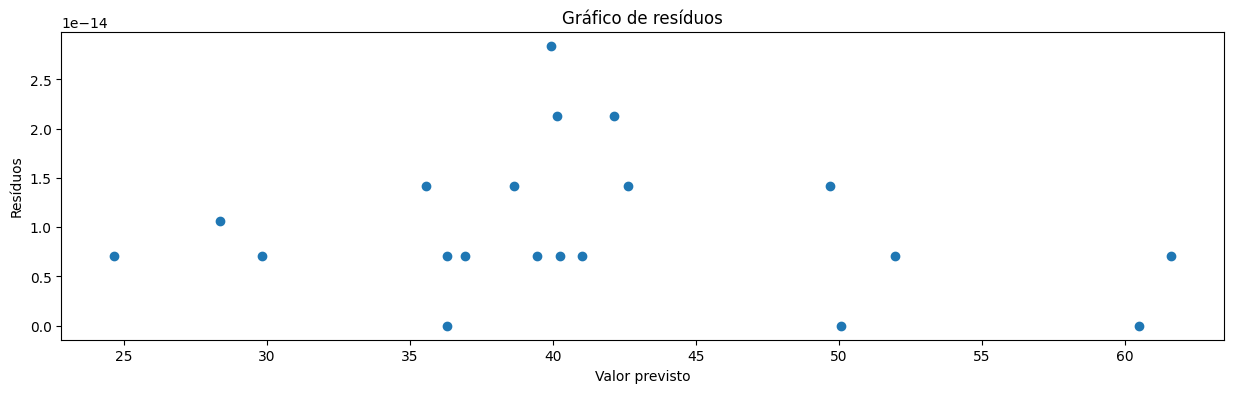

In [45]:
# Visando facilitar reuso para as próximas análises,
# segue código de análise de resíduos
import matplotlib.pyplot as plt

y_pred = lr.predict(X_test)

plt.figure(figsize=(15, 4))
plt.scatter(y_pred, y_test - y_pred)
plt.title("Gráfico de resíduos")
plt.xlabel("Valor previsto")
plt.ylabel("Resíduos")
plt.show()

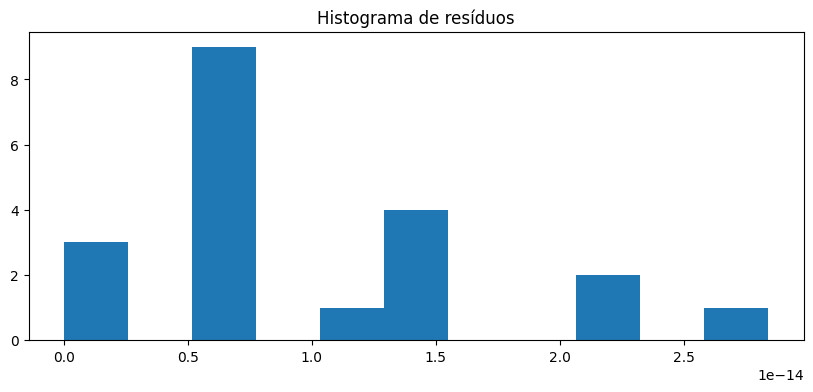

In [46]:
plt.figure(figsize=(10, 4))
plt.hist(y_test - y_pred, bins=11)
plt.title("Histograma de resíduos")
plt.show()

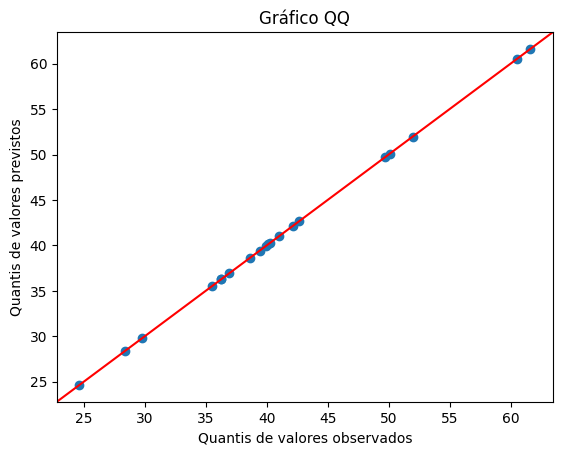

In [47]:
## Gráfico QQ
from statsmodels.graphics.gofplots import qqplot_2samples

qqplot_2samples(y_test, y_pred, line="45")
plt.title("Gráfico QQ")
plt.xlabel("Quantis de valores observados")
plt.ylabel("Quantis de valores previstos")
plt.show()

Sobre essa base, vamos agora construir as variantes sugeridas:

- adicionando uma variável linearmente dependente das variáveis anteriores
- com duas variáveis imperfeitamente correlacionadas (ruído na relação entre as variáveis)
- adicionando ruído no target (cf. numpy.random.normal ou outra distribuição)
- excluindo uma ou várias variáveis condicionantes do dataset para treinamento


In [48]:
# adicionando uma variável linearmente dependente das variáveis anteriores
df["3df0_2df1"] = 3 * df.c0 + 2 * df.c1
df

,c0,c1,c2,c3,c4,3df0_2df1
0,-0.937825,0.515048,0.515035,3.852731,0.513786,-1.783380
1,1.088951,-0.715304,0.064280,0.679598,-1.077745,1.836244
2,-0.601707,-1.057711,1.852278,0.822545,-0.013497,-3.920542
3,0.821903,0.091761,0.087047,-1.987569,-0.299007,2.649229
4,1.549934,0.813517,-0.783253,-1.230864,-0.322062,6.276838
...,...,...,...,...,...,...
95,0.232050,-0.718444,-1.448084,-0.213447,-1.407464,-0.740739
96,-1.415371,-0.802277,-0.420645,-0.161286,-0.342715,-5.850667
97,0.404051,0.257550,1.886186,-0.074446,0.174578,1.727253
98,-0.926930,-1.024388,-0.059525,-0.252568,-3.241267,-4.829567


In [49]:
# Agora, continue a análise como fizemos na aula anterior para esse caso de nova variável linearmente dependente